# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
# Your code here. 
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

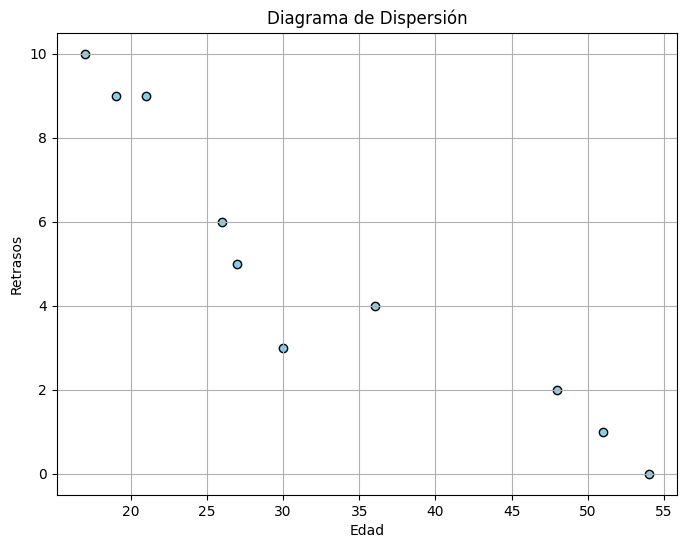

In [4]:
# Your code here
# Reemplaza 'Variable_X' y 'Variable_Y' con los nombres de tus columnas
x = student_data['Edad']
y = student_data['Retrasos']

# Crear el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='skyblue', edgecolor='black')
plt.title('Diagrama de Dispersión')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.grid(True)
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Cuanta mayor es la edad, menor es el volumen de retrasos.

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [5]:
# your code here
covarianza = student_data[['Edad', 'Retrasos']].cov().iloc[0, 1]
correlacion = student_data[['Edad', 'Retrasos']].corr().iloc[0, 1]

# Mostrar resultados
print(f"Covarianza entre Edad y Retrasos: {covarianza:.4f}")
print(f"Correlación entre Edad y Retrasos: {correlacion:.4f}")

Covarianza entre Edad y Retrasos: -45.5667
Correlación entre Edad y Retrasos: -0.9392


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

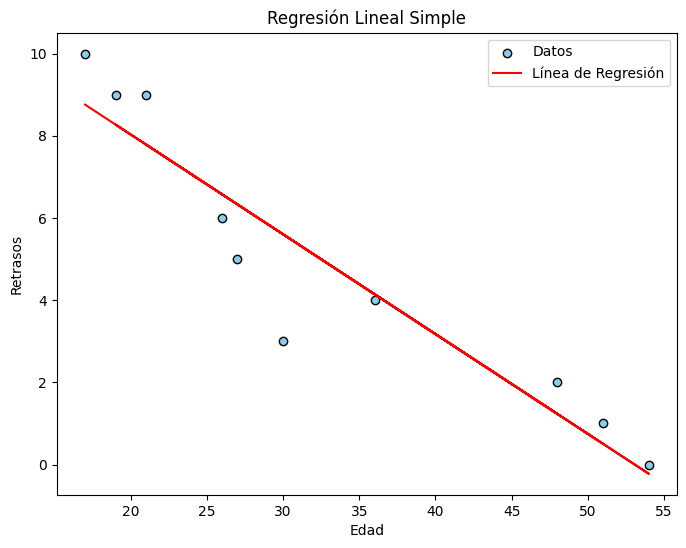

Pendiente de la regresión: -0.2428
Intersección (intercepto): 12.8888


In [6]:
# your explanation here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Ejemplo de datos en el DataFrame `df` (si ya tienes los datos, omite esta parte)
# df = pd.DataFrame({
#     'Variable_X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'Variable_Y': [10, 9, 6, 7, 8, 7, 5, 4, 2, 1]
# })

# Definir variable predictora (X) y variable de resultado (y)
X = student_data[['Edad']]  # Predictor
y = student_data['Retrasos']    # Resultado

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener el coeficiente y la intersección
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Predicciones usando el modelo
y_pred = modelo.predict(X)

# Graficar los datos y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='skyblue', edgecolor='black', label='Datos')
plt.plot(X, y_pred, color='red', label='Línea de Regresión')
plt.title('Regresión Lineal Simple')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.show()

# Resultados
print(f"Pendiente de la regresión: {pendiente:.4f}")
print(f"Intersección (intercepto): {intercepto:.4f}")

Grafica tu modelo de regresión en tu diagrama de dispersión.

In [7]:
# Your code here.

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

Podríamos decir que sirve para predecir la tardanza por ahora, pero mi experiencia personal me puede decir que sea un tema generacional y que pasado el tiempo puede extenderse la tardanza a personas de mayor edad.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [21]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"C:\Users\smont\Documents\first_repo\Labs\lab-regression-analysis-es\vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [35]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [36]:
columns_study = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

for i in columns_study:
    # Definir variable predictora (X) y variable de resultado (y)
    X = vehicles[[i]]  # Predictor
    y = vehicles['CO2 Emission Grams/Mile']    # Resultado
    
    # Crear y ajustar el modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    # Obtener el coeficiente y la intersección
    pendiente = modelo.coef_[0]
    intercepto = modelo.intercept_
    
    # Predicciones usando el modelo
    y_pred = modelo.predict(X)

    
    # Resultados
    print(f"{i} :")
    print(f"Pendiente de la regresión: {pendiente:.4f}")
    print(f"Intersección (intercepto): {intercepto:.4f}")
    print(" ")

Year :
Pendiente de la regresión: -2.6243
Intersección (intercepto): 5725.8633
 
Cylinders :
Pendiente de la regresión: 51.0352
Intersección (intercepto): 181.0946
 
Fuel Barrels/Year :
Pendiente de la regresión: 26.2836
Intersección (intercepto): 12.4865
 
Combined MPG :
Pendiente de la regresión: -21.5706
Intersección (intercepto): 905.2031
 
Fuel Cost/Year :
Pendiente de la regresión: 0.2186
Intersección (intercepto): 61.5631
 


Aparentemente las mayores contribuidoras por orden de importancia son: Cylinders, Fuel Barrels/Year, negativamente Combined MPG. La que menos aporta es el Fuel Cost/Year.

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

5700.291767194318 [-2.61142713]
Year    1984
dtype: int64
Year    2017
dtype: int64


C:\Users\smont\AppData\Local\Temp\ipykernel_14396\3427169502.py:38: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x_model = np.arange(int(xmin), int(xmax)+1)


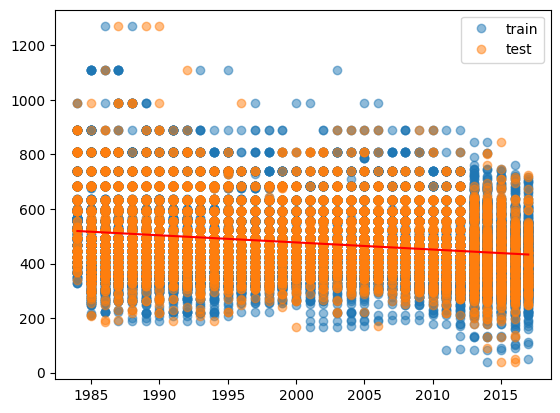

5700.291767194318 [-2.61142713]
0.0489240135375566 0.05129066961650952
13485.399005805639 13431.717639311302
RMSE: 115.89528739043364
R^2: 0.051290669616516404
180.4989325928529 [51.13818003]
Cylinders    2.0
dtype: float64
Cylinders    16.0
dtype: float64


C:\Users\smont\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\smont\AppData\Local\Temp\ipykernel_14396\3427169502.py:38: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x_model = np.arange(int(xmin), int(xmax)+1)


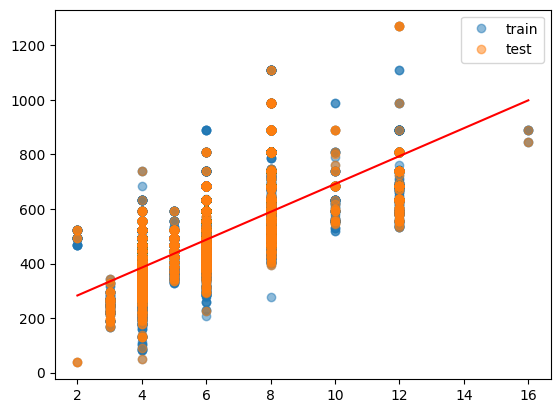

180.4989325928529 [51.13818003]
0.5652013633656578 0.5696272183923349
6165.052199460555 6093.1683678735135
RMSE: 78.05874946393588
R^2: 0.5696272183923351
12.237094442684395 [26.29660098]
Fuel Barrels/Year    0.0
dtype: float64
Fuel Barrels/Year    47.0
dtype: float64


C:\Users\smont\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\smont\AppData\Local\Temp\ipykernel_14396\3427169502.py:38: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x_model = np.arange(int(xmin), int(xmax)+1)


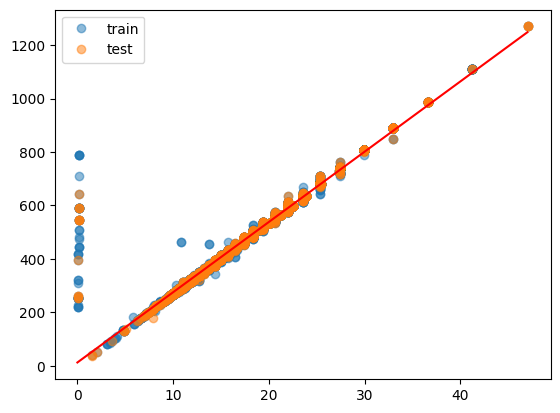

12.237094442684395 [26.29660098]
0.9731092544825526 0.9703968898064386
381.2864986899533 419.11743105194034
RMSE: 20.472357730655684
R^2: 0.9703968898064388
904.2957295678809 [-21.51980197]
Combined MPG    7
dtype: int64
Combined MPG    56
dtype: int64


C:\Users\smont\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\smont\AppData\Local\Temp\ipykernel_14396\3427169502.py:38: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x_model = np.arange(int(xmin), int(xmax)+1)


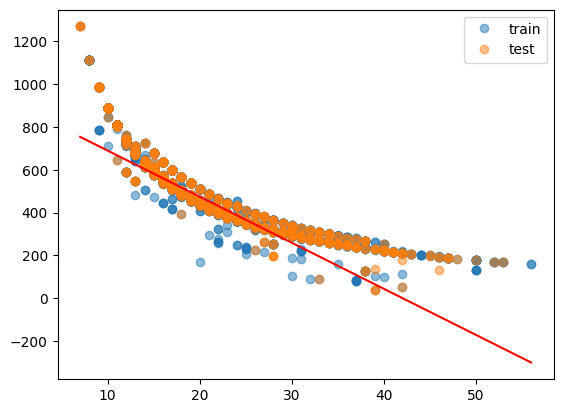

904.2957295678809 [-21.51980197]
0.8572194111012489 0.8605887047729397
2024.499870662643 1973.7690915969163
RMSE: 44.427121126592425
R^2: 0.8605887047729398
61.67794282678216 [0.21864237]
Fuel Cost/Year    600
dtype: int64
Fuel Cost/Year    5800
dtype: int64


C:\Users\smont\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\smont\AppData\Local\Temp\ipykernel_14396\3427169502.py:38: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x_model = np.arange(int(xmin), int(xmax)+1)


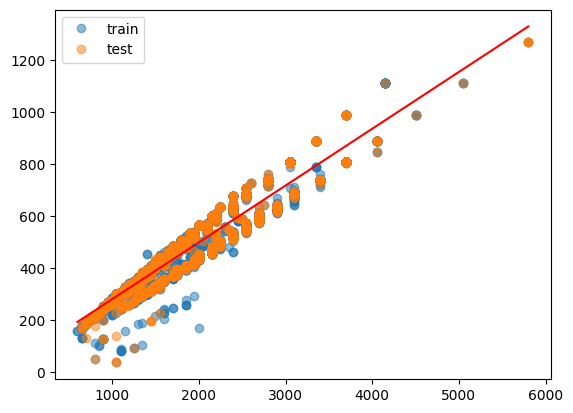

61.67794282678216 [0.21864237]
0.8667381456701357 0.8655759386773919
1889.532806496457 1903.1604072923947
RMSE: 43.62522673055542
R^2: 0.8655759386773939


C:\Users\smont\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
columns_study = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
seed = 123456
scores = []
regr_feat1 = LinearRegression()

for i in columns_study:
    # Definir variable predictora (X) y variable de resultado (y)
    X = vehicles[[i]]  # Predictor
    y = vehicles['CO2 Emission Grams/Mile']    # Resultado

    #from sklearn.model_selection import train_test_split
    # Split in train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)
    # from sklearn import linear_model
    
    # from sklearn.linear_model import LinearRegression
    # Create the Linear Regression estimator
    lm = LinearRegression()
    
    # Perform the fitting
    lm.fit(X_train, y_train)
    
    # Print coefs
    print(lm.intercept_, lm.coef_)

    xmin, xmax = round(X.min()), round(X.max())
    print(xmin)
    print(xmax)
    x_model = np.arange(int(xmin), int(xmax)+1)
    y_model=[lm.intercept_+lm.coef_*x for x in x_model] # np.arange returns evenly spaced values within a given interval.
    
    plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
    plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
    plt.plot(x_model, y_model,'r'); 
    
    plt.legend()
    plt.show()

    # Create the Linear Regression estimator
    lm = LinearRegression()
    
    # Perform the fitting
    lm.fit(X_train, y_train)
    
    # Print coefs
    print(lm.intercept_, lm.coef_)

    # Compute Score for training and testing sets 
    train_score = lm.score(X_train, y_train)
    test_score = lm.score(X_test, y_test)
    
    print(train_score, test_score)
    
    # Compute MSE for training and testing sets 
    y_train_pred = lm.predict(X_train)
    y_test_pred = lm.predict(X_test)
    
    mse_train = np.mean((y_train_pred - y_train)**2)
    mse_test = np.mean((y_test_pred - y_test)**2)
    print(mse_train, mse_test)

    X_train_df = pd.DataFrame(X_train)
    X_test_df = pd.DataFrame(X_test)
    X_train_df
    X_train_sm = sm.add_constant(X_train_df)
    est = sm.OLS(y_train, X_train_sm) # Creates an object OLS estimator
    est = est.fit()
    est.summary()

    X_test_sm = sm.add_constant(X_test_df)
    y_pred = est.predict(X_test_sm)
    
    # Evaluamos la performance del modelo con RMSE y R^2
    from sklearn.metrics import mean_squared_error, r2_score
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz del error cuadrático medio
    r2 = r2_score(y_test, y_pred)  # R^2
    
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

# Your code here.
'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year' son los mayores contribuyentes y con un error muy bajo.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

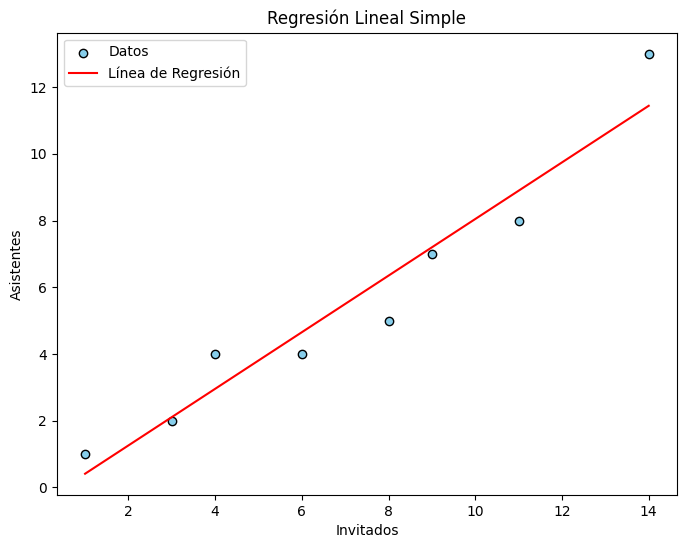

Pendiente de la regresión: 0.8485
Intersección (intercepto): -0.4394


In [62]:
# Your code here. 
student_data = pd.DataFrame({'Invitados': [1,3,4,6,8,9,11,14], 'Asistentes': [1,2,4,4,5,7,8,13]})
# your explanation here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Definir variable predictora (X) y variable de resultado (y)
X = student_data[['Invitados']]  # Predictor
y = student_data['Asistentes']    # Resultado

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener el coeficiente y la intersección
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Predicciones usando el modelo
y_pred = modelo.predict(X)

# Graficar los datos y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='skyblue', edgecolor='black', label='Datos')
plt.plot(X, y_pred, color='red', label='Línea de Regresión')
plt.title('Regresión Lineal Simple')
plt.xlabel('Invitados')
plt.ylabel('Asistentes')
plt.legend()
plt.show()

# Resultados
print(f"Pendiente de la regresión: {pendiente:.4f}")
print(f"Intersección (intercepto): {intercepto:.4f}")

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

Aparentemente tiene una evolución lineal, no podemos interpretar la hipótesis planteada.

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

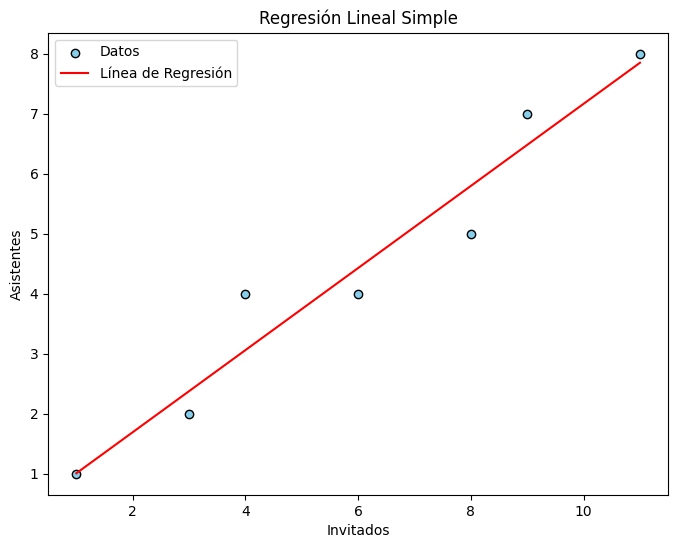

Pendiente de la regresión: 0.6842
Intersección (intercepto): 0.3233


In [63]:
# Your response here.
# Your code here. 
student_data = pd.DataFrame({'Invitados': [1,3,4,6,8,9,11], 'Asistentes': [1,2,4,4,5,7,8]})
# your explanation here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Definir variable predictora (X) y variable de resultado (y)
X = student_data[['Invitados']]  # Predictor
y = student_data['Asistentes']    # Resultado

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener el coeficiente y la intersección
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Predicciones usando el modelo
y_pred = modelo.predict(X)

# Graficar los datos y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='skyblue', edgecolor='black', label='Datos')
plt.plot(X, y_pred, color='red', label='Línea de Regresión')
plt.title('Regresión Lineal Simple')
plt.xlabel('Invitados')
plt.ylabel('Asistentes')
plt.legend()
plt.show()

# Resultados
print(f"Pendiente de la regresión: {pendiente:.4f}")
print(f"Intersección (intercepto): {intercepto:.4f}")

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

Ahora parece incluso más lineal y tiene un crecimiento más bajo pero aún así es un crecimiento positivo.